In [ ]:
# import os
# import numpy as np
# import tensorflow as tf
# from keras.applications.vgg19 import VGG19
# from keras.layers import Dense, LSTM, TimeDistributed, Flatten, Input
# from keras.models import Model
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# # Load the preprocessed data
# features, labels = np.load("Features/features_Own.npy"), np.load("Features/labels_Own.npy")

# # Ensure labels have the correct shape (avoid applying one-hot encoding twice)
# if labels.ndim == 3:
#     labels = np.reshape(labels, (labels.shape[0], labels.shape[2]))

# print("Loaded Features Shape:", features.shape)  # Expected: (num_samples, 16, 96, 96, 3)
# print("Loaded Labels Shape:", labels.shape)      # Expected: (num_samples, 2)

# # Split the dataset
# features_train, features_test, labels_train, labels_test = train_test_split(
#     features, labels, test_size=0.2, shuffle=True, random_state=42
# )

# # Build model function
# def build_model(application, model_layer):
#     base_model = application(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

#     # Make the base model non-trainable
#     for layer in base_model.layers:
#         layer.trainable = False

#     # Define input for the final model
#     input_shape = (16, 96, 96, 3)
#     model_input = Input(shape=input_shape)

#     # Add TimeDistributed to process sequential frames
#     x = TimeDistributed(base_model)(model_input)
#     x = TimeDistributed(Flatten())(x)

#     # Add LSTM or GRU for temporal processing
#     x = model_layer(256)(x)

#     # Final classification layer
#     output = Dense(2, activation='softmax')(x)
    
#     return Model(inputs=model_input, outputs=output)

# # Build and compile the model
# vgg19_model = build_model(VGG19, LSTM)
# vgg19_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# # Define callbacks
# early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=5, min_lr=0.00005, verbose=1)

# # Train the model
# history = vgg19_model.fit(
#     x=features_train,
#     y=labels_train,
#     epochs=50,
#     batch_size=8,
#     shuffle=True,
#     validation_split=0.2,
#     callbacks=[early_stopping_callback, reduce_lr]
# )

# # Evaluate the model
# test_loss, test_accuracy = vgg19_model.evaluate(features_test, labels_test)
# print(f"Test Accuracy: {test_accuracy:.2f}")

# # Predictions
# predicted_labels = []
# batch_size = 8
# for i in range(0, features_test.shape[0], batch_size):
#     batch_predictions = vgg19_model.predict(features_test[i:i + batch_size], verbose=0)
#     batch_predictions = np.argmax(batch_predictions, axis=1)
#     predicted_labels.extend(batch_predictions)

# predicted_labels = np.array(predicted_labels)
# true_labels = np.argmax(labels_test, axis=1)

# # Classification Report
# print("\nClassification Report:")
# print(classification_report(true_labels, predicted_labels))

# # Confusion Matrix
# conf_mat = confusion_matrix(true_labels, predicted_labels)
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# # ROC Curve
# fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

# # Loss curves visualization
# plt.figure(figsize=[6, 4])
# plt.plot(history.history['loss'], 'black', linewidth=2.0)
# plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
# plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
# plt.xlabel('Epochs', fontsize=10)
# plt.ylabel('Loss', fontsize=10)
# plt.title('Loss Curves', fontsize=12)
# plt.show()
 

Loaded Features Shape: (2000, 16, 96, 96, 3)
Loaded Labels Shape: (2000, 2)


/var/folders/26/dmz0gyj90q9gxy6nw_f2kwmm0000gn/T/ipykernel_82403/1715975692.py:30: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = application(weights='imagenet', include_top=False, input_shape=(96, 96, 3))


Epoch 1/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 188s 858ms/step - accuracy: 0.6862 - loss: 0.5716 - val_accuracy: 0.8906 - val_loss: 0.3197 - learning_rate: 0.0010
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 112s 699ms/step - accuracy: 0.9145 - loss: 0.2569 - val_accuracy: 0.9156 - val_loss: 0.2278 - learning_rate: 0.0010
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 112s 699ms/step - accuracy: 0.9682 - loss: 0.1457 - val_accuracy: 0.9156 - val_loss: 0.1956 - learning_rate: 0.0010
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 112s 700ms/step - accuracy: 0.9788 - loss: 0.0912 - val_accuracy: 0.9094 - val_loss: 0.2025 - learning_rate: 0.0010
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 112s 702ms/step - accuracy: 0.9813 - loss: 0.0621 - val_accuracy: 0.9281 - val_loss: 0.1857 - learning_rate: 0.0010
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 106s 663ms/step - accuracy: 0.9950 - loss: 0.0446 - val_accuracy: 0.9438 - val_loss: 0.1657 - learning_rate: 0.0010
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 102s 635ms/step - accura

13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.8963 - loss: 0.2127
Test Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       199
           1       0.87      0.94      0.90       201

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



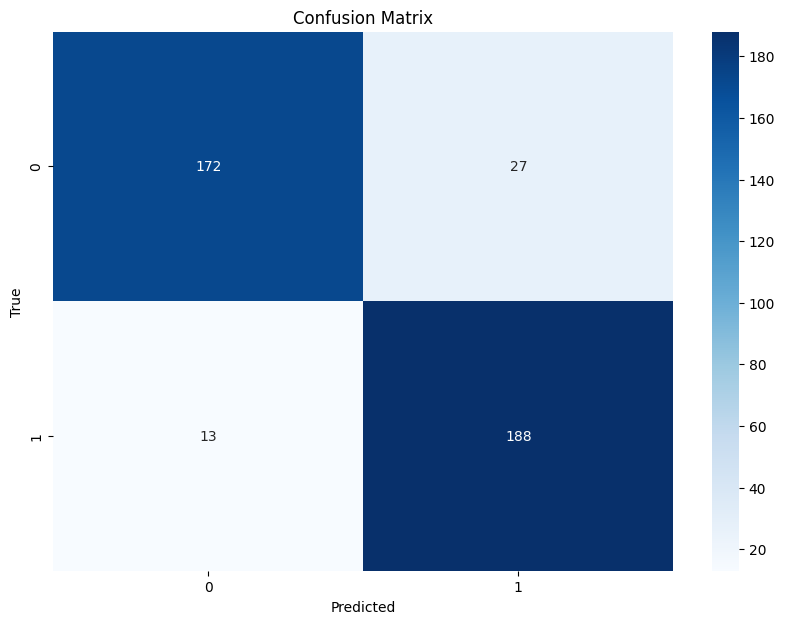

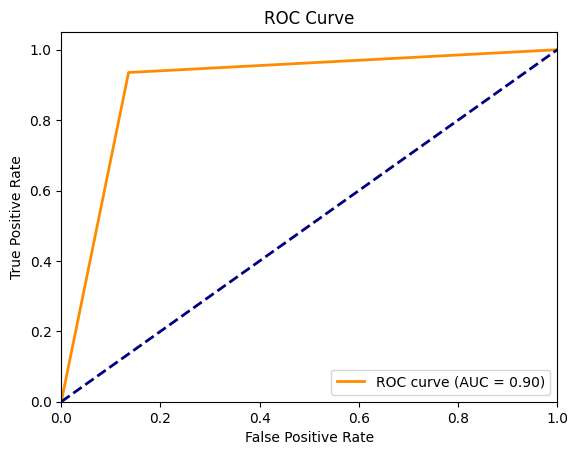

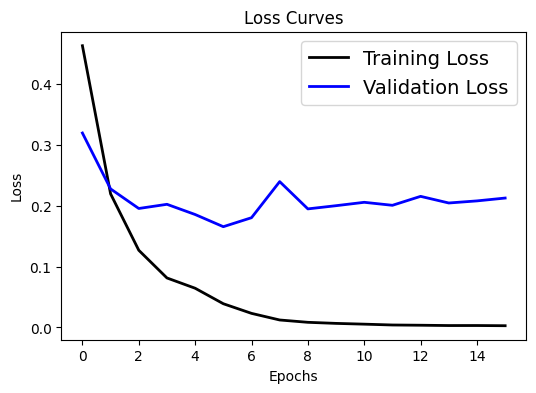

In [2]:
import numpy as np
import os
import tensorflow as tf
from keras.applications import MobileNet
from keras.layers import Dense, LSTM, TimeDistributed, Flatten, Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load the preprocessed data (96x96 frame size)
features, labels = np.load("Features/features_Own.npy"), np.load("Features/labels_Own.npy")

# Ensure labels have the correct shape (avoid applying one-hot encoding twice)
if labels.ndim == 3:
    labels = np.reshape(labels, (labels.shape[0], labels.shape[2]))

print("Loaded Features Shape:", features.shape)  # Expected: (num_samples, 16, 96, 96, 3)
print("Loaded Labels Shape:", labels.shape)      # Expected: (num_samples, 2)

# Split the dataset
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.2, shuffle=True, random_state=42
)

# Build model function using MobileNet with 96x96 frames
def build_model(application, model_layer):
    base_model = application(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

    # Make the base model non-trainable
    for layer in base_model.layers:
        layer.trainable = False

    # Define input for the final model
    input_shape = (16, 96, 96, 3)  # Using the preprocessed shape directly
    model_input = Input(shape=input_shape)

    # Add TimeDistributed to process sequential frames
    x = TimeDistributed(base_model)(model_input)
    x = TimeDistributed(Flatten())(x)

    # Add LSTM layer for temporal processing
    x = model_layer(128)(x)  # Using 128 units for faster training

    # Final classification layer
    output = Dense(2, activation='softmax')(x)
    
    return Model(inputs=model_input, outputs=output)

# Build and compile the model
mobilenet_model = build_model(MobileNet, LSTM)
mobilenet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=5, min_lr=0.00005, verbose=1)

# Train the model
history = mobilenet_model.fit(
    x=features_train,
    y=labels_train,
    epochs=50,
    batch_size=8,  # You can try reducing this to 4 if memory issues occur
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping_callback, reduce_lr]
)

# Save the trained model as an .h5 file
os.makedirs('models', exist_ok=True)  # Create the directory if not exists
mobilenet_model.save('models/violence_detection_model.h5')

# Evaluate the model
test_loss, test_accuracy = mobilenet_model.evaluate(features_test, labels_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions
predicted_labels = []
batch_size = 8
for i in range(0, features_test.shape[0], batch_size):
    batch_predictions = mobilenet_model.predict(features_test[i:i + batch_size], verbose=0)
    batch_predictions = np.argmax(batch_predictions, axis=1)
    predicted_labels.extend(batch_predictions)

predicted_labels = np.array(predicted_labels)
true_labels = np.argmax(labels_test, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

# Confusion Matrix
conf_mat = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Loss curves visualization
plt.figure(figsize=[6, 4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)
plt.show()
